
# <font color='red'>Regressão Linear</font>
##### <font color='yellow'>Entendento a parte teorica -> </font>

- **A regressão linear é uma técnica estatística usada para entender a relação entre duas ou mais variáveis. É particularmente útil quando você quer prever o valor de uma variável com base no valor de outra variável, assumindo que existe uma relação linear entre elas.**

- **Na forma mais simples, a regressão linear envolve duas variáveis: uma variável independente (também chamada de variável explanatória ou preditora) e uma variável dependente (também chamada de variável de resposta). A ideia é encontrar a melhor linha reta que se ajusta aos dados, minimizando a distância entre os pontos de dados e a linha.**

- **Esta linha é representada por uma equação linear, geralmente na forma y = mx + b, (só lembrar da function de 1° grau) onde y é a variável dependente, x é a variável independente, m é a inclinação da linha e b é a interseção no eixo y (o valor de y quando x é zero). Uma vez que essa linha é determinada, você pode usar essa equação para fazer previsões sobre a variável dependente com base nos valores da variável independente.**



documentação:
    - https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares


In [1]:
# Podemos considerar esses dados abaixo
import pandas as pd 

dados = pd.DataFrame({
    'X': [1,2,3,4,5],
    'Y': [1.3,1.8,3.5,4,4.6]
})

dados.head(2)

,X,Y
0,1,1.3
1,2,1.8


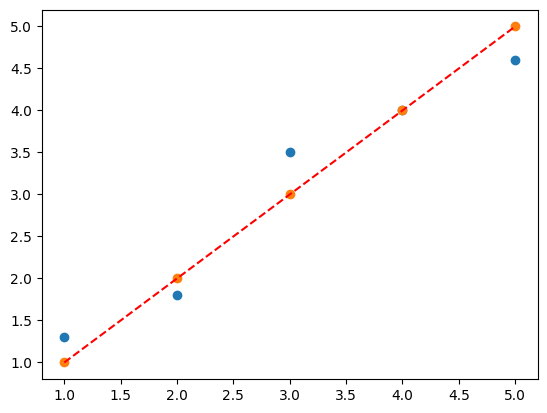

In [4]:
# Visualizando esses pontos graficamente, podemos traçar uma reta que passa por esse pontos
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.scatter(dados.X,dados.Y)
ax.plot(dados.X,dados.y_reta,'--r' )
ax.scatter(dados.X,dados.y_reta) # pontos na reta vermelha, que seria nossa previsão

plt.show()

In [3]:
# Nessa reta vermelha, fizemos que y = x, então podemos escrever o y_reta como
dados['y_reta'] = dados.X

- **Vamos usar a regressão linear para traçar a melhor reta que passa por esses pontos**
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [5]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [6]:
# Criando o regressor
reg = LinearRegression().fit(dados.X.values.reshape(-1,1),dados.Y)
# meu regressor, por ser reta liner, vai ser igual a função de primeiro grau


# esse vai apresentar um erro por conta do array
# reg = LinearRegression().fit(dados.X, dados.Y)
# erro por causa do array:
# Expected a 2-dimensional container but got

In [7]:
# Visualizando o coeficiente angular
a = reg.coef_[0]

In [8]:
# e o coeficiente linear
b = reg.intercept_

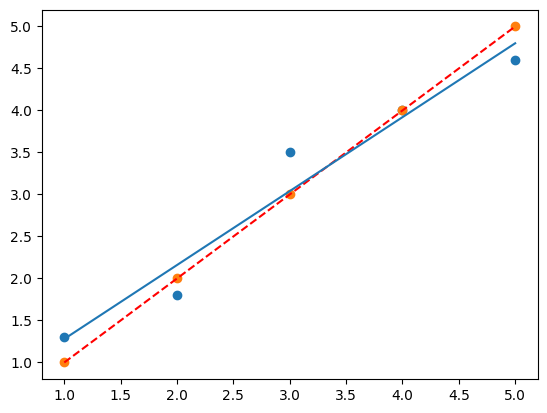

In [9]:
# Visualizando graficamente
fig,ax = plt.subplots()

ax.scatter(dados.X,dados.Y)
ax.plot(dados.X,dados.y_reta,'--r' )
ax.scatter(dados.X,dados.y_reta)

x = dados.X.values
y = a*x + b
ax.plot(x,y)


plt.show()

In [10]:
# Fazendo a previsão e adicionando na base
dados['y_pred'] = reg.predict(dados.X.values.reshape(-1,1))


dados

,X,Y,y_reta,y_pred
0,1,1.3,1,1.28
1,2,1.8,2,2.16
2,3,3.5,3,3.04
3,4,4.0,4,3.92
4,5,4.6,5,4.80


In [11]:
# Calculando o erro da reta vermelha e da regressão
# o erro é a diferença entre um valor e outro, elevado ao quadrado

dados['erro_reta'] = (dados.Y - dados.y_reta) **2   # se tiver duvida, da uma olhada em uma só linha dessa
dados['erro_pred'] = (dados.Y - dados.y_pred) **2


In [12]:
# Verificando essa base e a soma do erro, pra ver qual erro é menor 0.388
dados[['erro_reta', 'erro_pred']].sum()

erro_reta    0.540
erro_pred    0.388
dtype: float64

- Pdemos utilizar o erro médio absoluto e o erro médio quadrático do próprio scikit-learn para calcular esses erros
    - https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

In [13]:
# Além disso, também podemos usar o erro médio absoluto e o erro médio quadrático do próprio scikit-l

from sklearn.metrics import mean_squared_error  # 
from sklearn.metrics import mean_absolute_error # absoluteerror é a distancia entre cada um dos pontos os pontos

In [14]:
# Visualizando o resultado da previsão, a reta gerada pela regressão linear se ajusta melhor
print(mean_absolute_error(dados.Y, dados.y_reta))
print(mean_squared_error(dados.Y, dados.y_reta))
print(mean_absolute_error(dados.Y, dados.y_pred))
print(mean_squared_error(dados.Y, dados.y_pred))

0.2800000000000001
0.10800000000000005
0.22400000000000003
0.07760000000000003


### Usando a Regressão Linear de forma prática
- **Vamos utilizar o dataset de casas da Califórnia**
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [15]:
# Importando o dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing

In [16]:
# Visualizando
data()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [18]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Carregar os dados
data = fetch_california_housing()

# Criar DataFrame
casas = pd.DataFrame(data.data, columns=data.feature_names)
casas['MedHouseVal'] = data.target




In [19]:
# Visualizando o dataframe
casas

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


- **Regressão Linear Simples**
- vamos relacionar apenas uma unica coluna com o nosso target


In [20]:
# Separando X e Y
X = casas.MedInc
y = casas.MedHouseVal

- Separando nossa base em treino e teste para criarmos o modelo
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [22]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
# Usando a regressão linear
reg = LinearRegression() .fit(X_train.values.reshape(-1,1), y_train)

In [26]:
# Avaliando o erro
y_pred = reg.predict(X_test.values.reshape(-1,1))

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.6265986453094173
0.7028461448540976


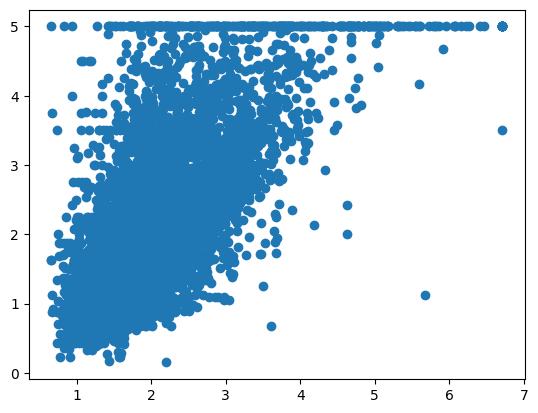

In [27]:
# Visualizando a relação do y_test com o y_pred

fig,ax = plt.subplots()

ax.scatter(y_pred, y_test)

plt.show()



<a id='linear_multipla'></a>
- **Regressão Linear Múltipla**

- Primeiro fazendo para apenas duas variáveis

In [ ]:
# Separando X e Y

In [ ]:
# Separando em treino e teste

In [ ]:
# Usando a regressão linear

In [ ]:
# Da mesma forma, também vamos ter o coef_

In [ ]:
# E o intercept_

In [ ]:
# Avaliando o erro

In [ ]:
# Visualizando a relação do y_test com o y_pred

- Podemos [voltar](#linear_multipla) e considerar qualquer coluna para o modelo